# <span style="color:blue"> SLACK - BOT</span>
## <span style="color:blue"> 1) Exploración de los datos </span>

In [1]:
#!pip install googletrans

In [2]:
# Importamos librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from googletrans import Translator
from datetime import datetime
import time

In [3]:
# para que los numeros flotantes me los muestre solo con dos decimales
pd.options.display.float_format = '{:.2f}'.format

In [4]:
df = pd.read_csv('files/slack_historial_de_mensajes.csv')#, index_col='Unnamed: 0')

In [5]:
df[:2]

,Unnamed: 0,client_msg_id,type,text,user,ts,team,blocks,bot_id,bot_profile,...,subscribed,reactions,subtype,inviter,edited,attachments,Channel_id,Channel_name,bot_link,purpose
0,0,322839bd-31c3-4ff7-8b6e-d824a5cdb847,message,"Gracias. Ya les escribí, espero se una alguien.",U01B5AQPV39,1604419608.00,T01BYMK9H7B,"[{'type': 'rich_text', 'block_id': '4FXOH', 'e...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,C01C9U9CJ3S,dailys,NaN,NaN
1,1,dde8d327-4621-4128-82e1-0a33b866967e,message,<https://drive.google.com/drive/u/1/folders/1g...,U01BYMTTXCH,1604415407.00,T01BYMK9H7B,"[{'type': 'rich_text', 'block_id': '7OT', 'ele...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,C01C9U9CJ3S,dailys,NaN,NaN


In [6]:
df.columns

Index(['Unnamed: 0', 'client_msg_id', 'type', 'text', 'user', 'ts', 'team',
       'blocks', 'bot_id', 'bot_profile', 'files', 'upload', 'display_as_bot',
       'thread_ts', 'reply_count', 'reply_users_count', 'latest_reply',
       'reply_users', 'subscribed', 'reactions', 'subtype', 'inviter',
       'edited', 'attachments', 'Channel_id', 'Channel_name', 'bot_link',
       'purpose'],
      dtype='object')

In [7]:
df.shape

(784, 28)

* Iniciamos con 784 mensajes descargados de slack

## <span style="color:blue">2) Filtrado de los mensajes irrelevantes </span>

In [8]:
# 1) Filtramos los mensajes que haya publicado el bot
df= df.drop(df[df['bot_id']=='B01CM1J688G'].index)

In [9]:
df.shape

(564, 28)

In [10]:
# 2) Filtramos los mensajes de aviso de un nuevo miembro en el canal
df.drop(df[df.text.str.contains('se ha unido al canal', na=False)].index, inplace = True)

In [11]:
df.shape

(529, 28)

In [12]:
# 3) Filtramos los mensajes de pedidos de descarga para el bot
df.drop(df[df.text.str.contains('descargar', na=False)].index, inplace = True)

In [13]:
df.shape

(456, 28)

In [14]:
# 4) Filtramos los mensajes en los que arrobamos al bot para saludarlo
df.drop(df[df.text.str.contains('<@U01BXC8LK27>', na=False)].index, inplace = True)

In [15]:
df.shape

(433, 28)

In [16]:
# 5) Filtramos los mensajes en los que se comparten direcciones web
df.drop(df[df.text.str.contains('<https://', na=False)].index, inplace = True)

In [17]:
df.shape

(397, 28)

In [18]:
# Despues del proceso de filtrado, reseteamos el índice para evitar problemas futuros
df.reset_index(inplace=True)

## <span style="color:blue">3) Transformación de datos</span>
### 3.1) Traducción de los mensajes

In [19]:
translator= Translator()

In [21]:
translations = []

for i in range(0, len(df)):
    message=str(df.iloc[i]['text'])
    new= translator.translate(message, dest='en')
    if new is None:
       new = "error"
    translations.append(new.text)
df['translations'] = pd.Series(translations)

In [22]:
important_cols=['ts','Channel_id','user', 'Channel_name','text','translations']

In [23]:
important_cols

['ts', 'Channel_id', 'user', 'Channel_name', 'text', 'translations']

In [24]:
df_short= df[important_cols]

In [25]:
df_short[:10]

,ts,Channel_id,user,Channel_name,text,translations
0,1604419608.00,C01C9U9CJ3S,U01B5AQPV39,dailys,"Gracias. Ya les escribí, espero se una alguien.","Thank you. I already wrote, I hope someone wil..."
1,1604063926.00,C01C9U9CJ3S,U01BDB84630,dailys,Cuidese no mas,Take care no more
2,1604063557.00,C01C9U9CJ3S,U01BS8YKHS8,dailys,hola buenos días ! ok :wink:,Hello good day ! ok: wink:
3,1604063525.00,C01C9U9CJ3S,U01BYMTTXCH,dailys,No pasa nada!,Nothing happens!
4,1604063521.00,C01C9U9CJ3S,U01BYMTTXCH,dailys,Dale Ivan! Buen día!,Go Ivan! Good day!
5,1604063470.00,C01C9U9CJ3S,U01B5AQPV39,dailys,Hola. Muy buenos días.\nNo podré estar hoy en ...,Hi. Very good days.\nI won't be able to be in ...
6,1603831026.01,C01C9U9CJ3S,U01BYMTTXCH,dailys,Jajajajaja,Hahaha
7,1603827652.01,C01C9U9CJ3S,U01BS8YKHS8,dailys,Si pueden por hoy cerrar este slack asi no les...,If you can close this slack for today so I don...
8,1603827001.01,C01C9U9CJ3S,U01BS8YKHS8,dailys,jaja puede ser... les prometo que no me queda ...,haha it could be ... I promise you I don't hav...
9,1603826944.01,C01C9U9CJ3S,U01BDB84630,dailys,"Vero, te vas a tener que plantear otro modo de...","Vero, you are going to have to consider anothe..."


### 3.2) Transformación de fechas
* La variable fecha viene en formato timestamp (marca de tiempo Unix): Cantidad de segundos que han transcurrido desde el **01/01/1970**

In [26]:
from datetime import datetime
import time

In [27]:
# Transformo la variable 'ts'(timestamp) a una nueva variable 'datetime'
date = []

for i in range(0, len(df_short)):
    timestamp=df.iloc[i]['ts']
    dt_object = datetime.fromtimestamp(timestamp)
    date.append(dt_object)
df_short['datetime'] = pd.Series(date)

C:\Users\verob\miniconda3\envs\meraki2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
# Separo la información de fecha y hora en columnas diferentes
df_short['date'] = [d.date() for d in df_short['datetime']]
df_short['time'] = [d.time() for d in df_short['datetime']]

C:\Users\verob\miniconda3\envs\meraki2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\verob\miniconda3\envs\meraki2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
# Separo la información de hora, minuto y segundo en columnas diferentes
df_short[["h","m","s"]] = pd.DataFrame([(x.hour, x.minute, x.second) for x in df_short["time"]])

C:\Users\verob\miniconda3\envs\meraki2\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [30]:
df_short[:5]

,ts,Channel_id,user,Channel_name,text,translations,datetime,date,time,h,m,s
0,1604419608.00,C01C9U9CJ3S,U01B5AQPV39,dailys,"Gracias. Ya les escribí, espero se una alguien.","Thank you. I already wrote, I hope someone wil...",2020-11-03 13:06:48.000700,2020-11-03,13:06:48.000700,13,6,48
1,1604063926.00,C01C9U9CJ3S,U01BDB84630,dailys,Cuidese no mas,Take care no more,2020-10-30 10:18:46.003400,2020-10-30,10:18:46.003400,10,18,46
2,1604063557.00,C01C9U9CJ3S,U01BS8YKHS8,dailys,hola buenos días ! ok :wink:,Hello good day ! ok: wink:,2020-10-30 10:12:37.003000,2020-10-30,10:12:37.003000,10,12,37
3,1604063525.00,C01C9U9CJ3S,U01BYMTTXCH,dailys,No pasa nada!,Nothing happens!,2020-10-30 10:12:05.002700,2020-10-30,10:12:05.002700,10,12,5
4,1604063521.00,C01C9U9CJ3S,U01BYMTTXCH,dailys,Dale Ivan! Buen día!,Go Ivan! Good day!,2020-10-30 10:12:01.002500,2020-10-30,10:12:01.002500,10,12,1


## <span style="color:blue">4) Análisis de datos y Visualización </span>
### 4.1) Análisis de polaridad y subjetividad

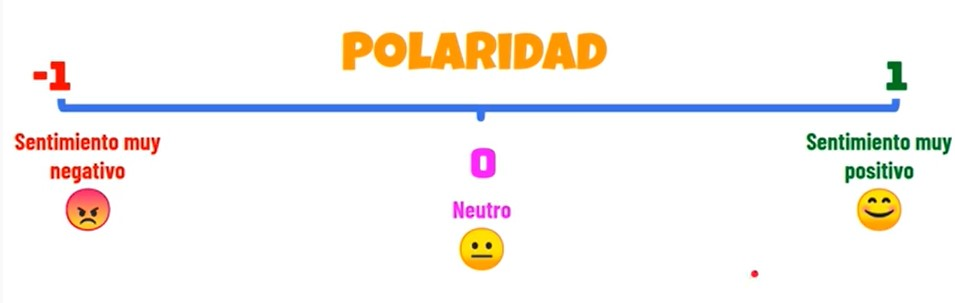

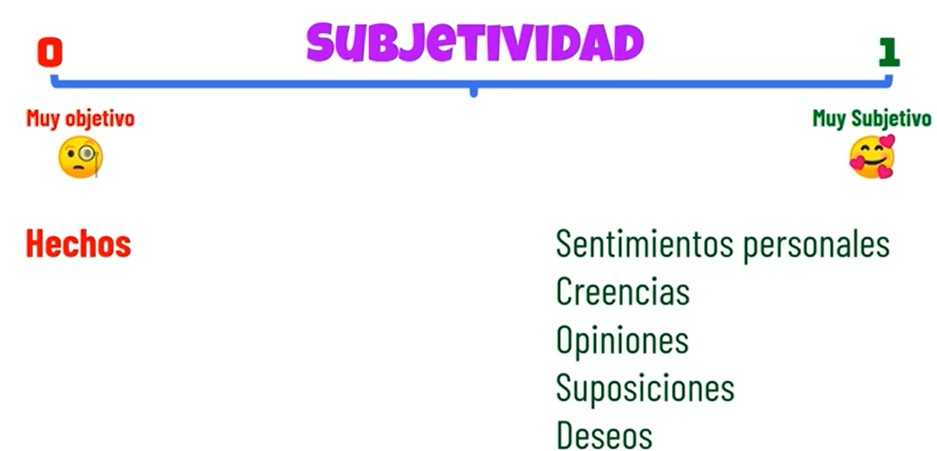

In [31]:
# Creo dos nuevas variables en el dataset para almacenar la información de los índices de polaridad y subjetividad
df_short['polarity'] = df_short['translations'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_short['subjectivity'] = df_short['translations'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

C:\Users\verob\miniconda3\envs\meraki2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\verob\miniconda3\envs\meraki2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
df_short[:5]

,ts,Channel_id,user,Channel_name,text,translations,datetime,date,time,h,m,s,polarity,subjectivity
0,1604419608.00,C01C9U9CJ3S,U01B5AQPV39,dailys,"Gracias. Ya les escribí, espero se una alguien.","Thank you. I already wrote, I hope someone wil...",2020-11-03 13:06:48.000700,2020-11-03,13:06:48.000700,13,6,48,0.00,0.00
1,1604063926.00,C01C9U9CJ3S,U01BDB84630,dailys,Cuidese no mas,Take care no more,2020-10-30 10:18:46.003400,2020-10-30,10:18:46.003400,10,18,46,-0.25,0.50
2,1604063557.00,C01C9U9CJ3S,U01BS8YKHS8,dailys,hola buenos días ! ok :wink:,Hello good day ! ok: wink:,2020-10-30 10:12:37.003000,2020-10-30,10:12:37.003000,10,12,37,0.69,0.55
3,1604063525.00,C01C9U9CJ3S,U01BYMTTXCH,dailys,No pasa nada!,Nothing happens!,2020-10-30 10:12:05.002700,2020-10-30,10:12:05.002700,10,12,5,0.00,0.00
4,1604063521.00,C01C9U9CJ3S,U01BYMTTXCH,dailys,Dale Ivan! Buen día!,Go Ivan! Good day!,2020-10-30 10:12:01.002500,2020-10-30,10:12:01.002500,10,12,1,0.88,0.60


In [33]:
important_cols = ['polarity', 'subjectivity']
df_short[important_cols].describe()

,polarity,subjectivity
count,397.00,397.00
mean,0.06,0.09
std,0.20,0.23
min,-0.70,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,0.00,0.00
max,1.00,1.00


In [34]:
channels= df_short.Channel_name.unique()
channels

array(['dailys', 'novedades', 'test', 'general'], dtype=object)

In [35]:
# Creo un sub-dataset por cada canal
dailys = df_short[(df_short.Channel_name == "dailys")]
novedades = df_short[(df_short.Channel_name == "novedades")]
test = df_short[(df_short.Channel_name == "test")]
general = df_short[(df_short.Channel_name == "general")]

Text(0.5, 1.0, 'Histograma de distribución del índice de Subjetividad por canales')

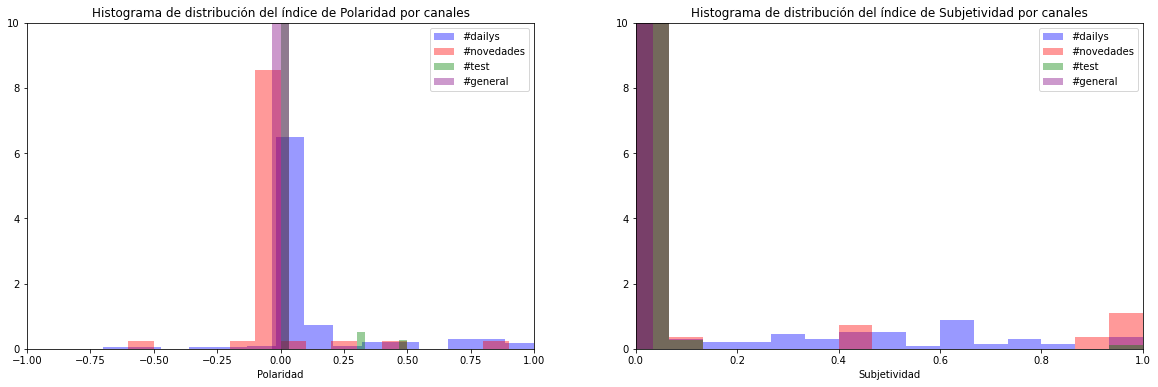

In [36]:
plt.figure (figsize=(20,6))

plt.subplot(121)
sns.distplot(dailys.polarity, color='blue', label='#dailys', bins=15, kde=False, norm_hist=True)
sns.distplot(novedades.polarity, color='red', label='#novedades', bins=15, kde=False, norm_hist=True)
sns.distplot(test.polarity, color='green', label='#test', bins=15, kde=False, norm_hist=True)
sns.distplot(general.polarity, color='purple', label='#general', bins=15, kde=False, norm_hist=True)
plt.xlabel('Polaridad')
plt.xlim(-1,1)
plt.ylim(0,10)
plt.legend()
plt.title('Histograma de distribución del índice de Polaridad por canales')

plt.subplot(122)
sns.distplot(dailys.subjectivity, color='blue', label='#dailys', bins=15, kde=False, norm_hist=True)
sns.distplot(novedades.subjectivity, color='red', label='#novedades', bins=15, kde=False, norm_hist=True)
sns.distplot(test.subjectivity, color='green', label='#test', bins=15, kde=False, norm_hist=True)
sns.distplot(general.subjectivity, color='purple', label='#general', bins=15, kde=False, norm_hist=True)
plt.xlabel('Subjetividad')
plt.xlim(0,1)
plt.ylim(0,10)
plt.legend()
plt.title('Histograma de distribución del índice de Subjetividad por canales')

C:\Users\verob\miniconda3\envs\meraki2\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\verob\miniconda3\envs\meraki2\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


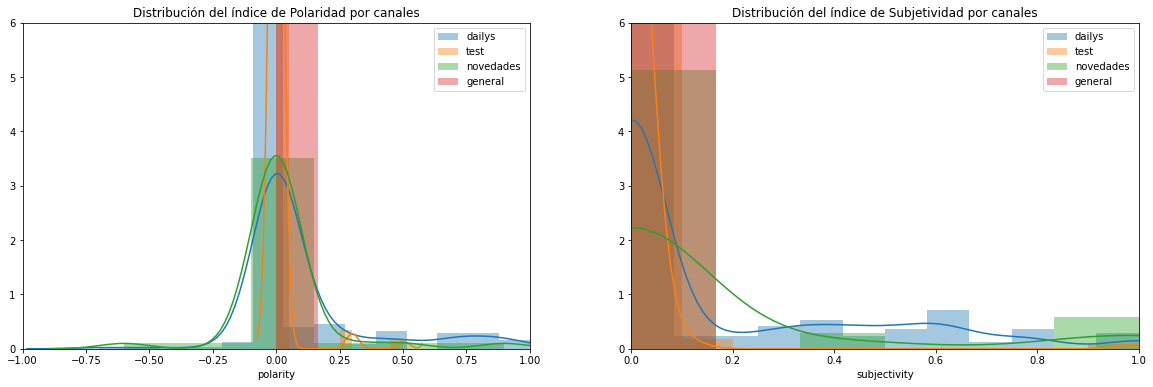

In [37]:
plt.figure (figsize=(20,6))

plt.subplot(121)
plt.title('Distribución del índice de Polaridad por canales')
sns.distplot(dailys.polarity, label='dailys')
sns.distplot(test.polarity, label='test')
sns.distplot(novedades.polarity, label='novedades')
sns.distplot(general.polarity, label='general')
plt.ylim(0,6)
plt.xlim(-1,1)
plt.legend()

plt.subplot(122)
plt.title('Distribución del índice de Subjetividad por canales')
sns.distplot(dailys.subjectivity, label='dailys')
sns.distplot(test.subjectivity, label='test')
sns.distplot(novedades.subjectivity, label='novedades')
sns.distplot(general.subjectivity, label='general')
plt.ylim(0,6)
plt.xlim(0,1)
plt.legend()

* Podemos observar que en todos los canales, la mayoría de los mensajes poseen una polaridad neutral.
* El canal dailys es el canal en que se registran mayor frecuencia de mensajes negativos
* Son mucho más los mensajes positivos compartidos en todos los canales, respectos de los mensajes negativos
* En cuanto a la subjetividad, se aprecia que la mayoría de los mensajes compartidos en todos los canales, poseen un tono altamente jetivo

### 4.2) Análisis de series de tiempo

In [38]:
#!pip install statsmodels

In [39]:
from datetime import datetime  # librería de con funciones para manipular objetos de tiempo.
import pandas as pd            # librería para la manipulación y limpieza de datos.
import matplotlib              # librería especializada en visualización de datos.
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose # librería que contiene funciones y modelos estadísticos para el análisis de datos

In [40]:
print(df_short.dtypes)

ts                     float64
Channel_id              object
user                    object
Channel_name            object
text                    object
translations            object
datetime        datetime64[ns]
date                    object
time                    object
h                        int64
m                        int64
s                        int64
polarity               float64
subjectivity           float64
dtype: object


In [41]:
df_short.set_index('datetime', inplace=True)

In [42]:
df_sub= dailys['subjectivity']

<AxesSubplot:>

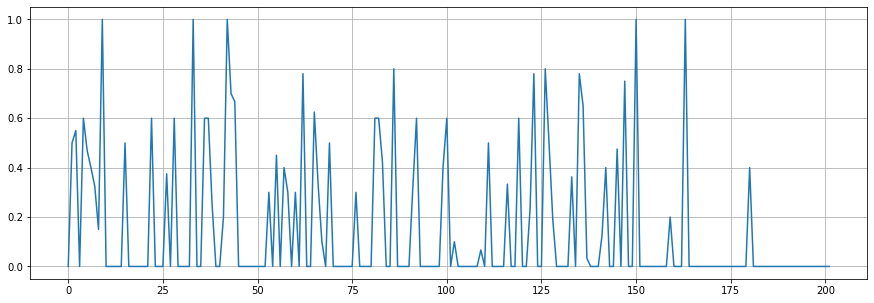

In [43]:
# Ahora que la variable 'datetime' se reconoce como una serie de tiempo, es momento de visualizar nuestros datos
df_sub.plot(grid=True, figsize=(15,5))

In [44]:
df_pol= dailys['polarity']

<AxesSubplot:>

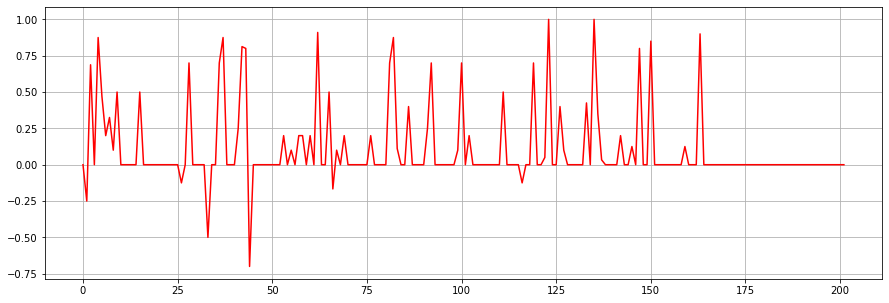

In [45]:
df_pol.plot(grid=True, figsize=(15,5), color='red')

(0.0, 1.1)

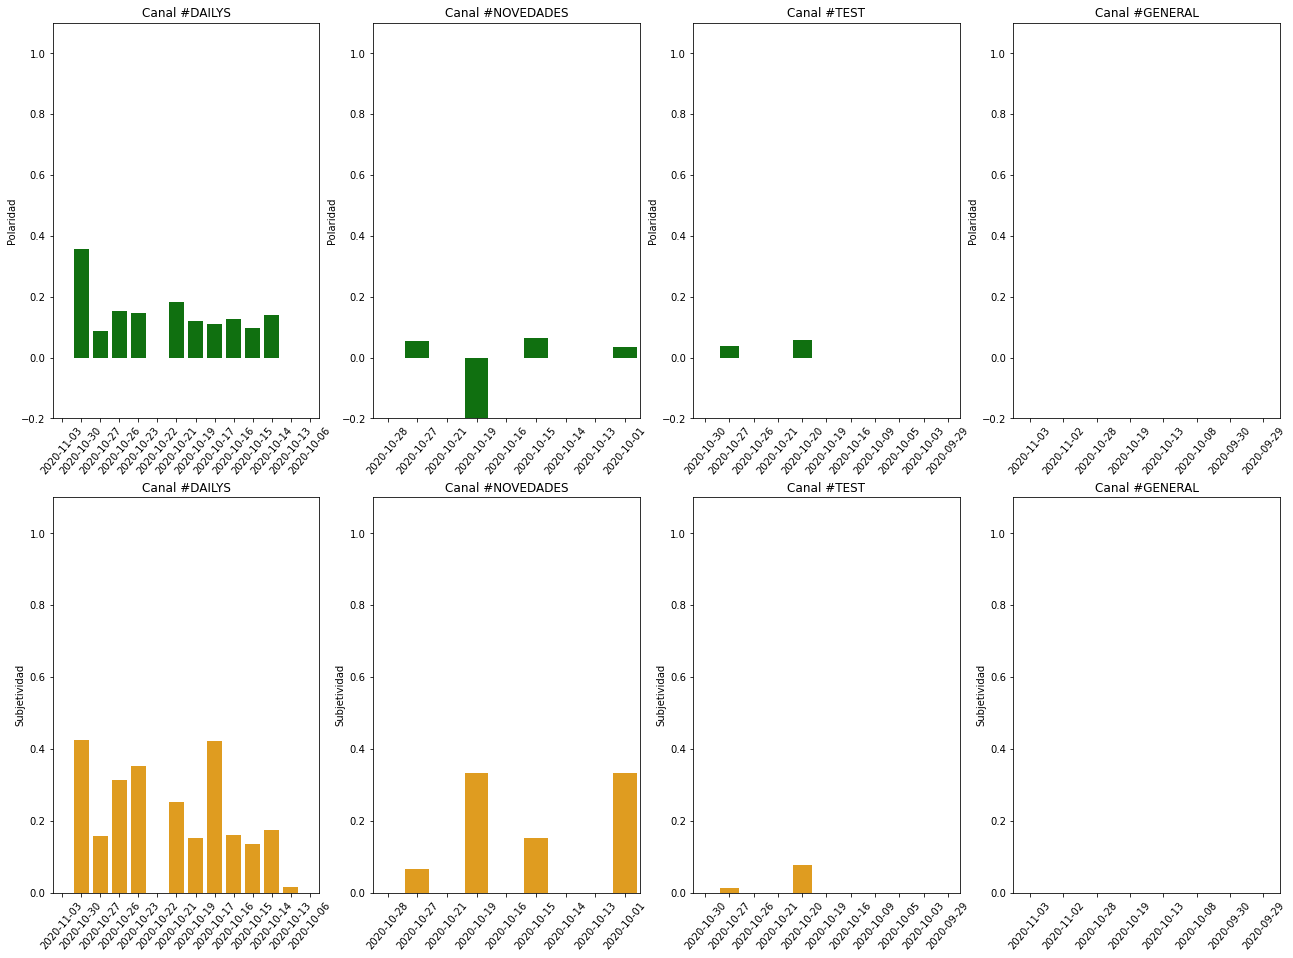

In [46]:
plt.figure (figsize=(22,16))

################################## POLARITY ###################################################
plt.subplot(241)
sns.barplot (x=dailys.date, y=dailys.polarity, ci=None,  color='green')
plt.xticks(rotation=50)
plt.title("Canal #DAILYS")
plt.ylabel('Polaridad')
plt.xlabel('')
plt.ylim(-0.2,1.1)

plt.subplot(242)
sns.barplot (x=novedades.date, y=novedades.polarity, ci=None,  color='green')
plt.xticks(rotation=50)
plt.title("Canal #NOVEDADES")
plt.ylabel('Polaridad')
plt.xlabel('')
plt.ylim(-0.2,1.1)

plt.subplot(243)
sns.barplot (x=test.date, y=test.polarity, ci=None,  color='green')
plt.xticks(rotation=50)
plt.title("Canal #TEST")
plt.ylabel('Polaridad')
plt.xlabel('')
plt.ylim(-0.2,1.1)

plt.subplot(244)
sns.barplot (x=general.date, y=general.polarity, ci=None,  color='green')
plt.xticks(rotation=50)
plt.title("Canal #GENERAL")
plt.ylabel('Polaridad')
plt.xlabel('')
plt.ylim(-0.2,1.1)


################################## SUBJECTIVITY ###################################################

plt.subplot(245)
sns.barplot (x=dailys.date, y=dailys.subjectivity, ci=None, color='orange')
plt.xticks(rotation=50)
plt.title("Canal #DAILYS")
plt.ylabel('Subjetividad')
plt.xlabel('')
plt.ylim(0,1.1)

plt.subplot(246)
sns.barplot (x=novedades.date, y=novedades.subjectivity, ci=None,  color='orange')
plt.xticks(rotation=50)
plt.title("Canal #NOVEDADES")
plt.ylabel('Subjetividad')
plt.xlabel('')
plt.ylim(0,1.1)

plt.subplot(247)
sns.barplot (x=test.date, y=test.subjectivity, ci=None, color='orange')
plt.xticks(rotation=50)
plt.title("Canal #TEST")
plt.ylabel('Subjetividad')
plt.xlabel('')
plt.ylim(0,1.1)

plt.subplot(248)
sns.barplot (x=general.date, y=general.subjectivity, ci=None,  color='orange')
plt.xticks(rotation=50)
plt.title("Canal #GENERAL")
plt.ylabel('Subjetividad')
plt.xlabel('')
plt.ylim(0,1.1)


Text(0.5, 1.0, 'Canal #test')

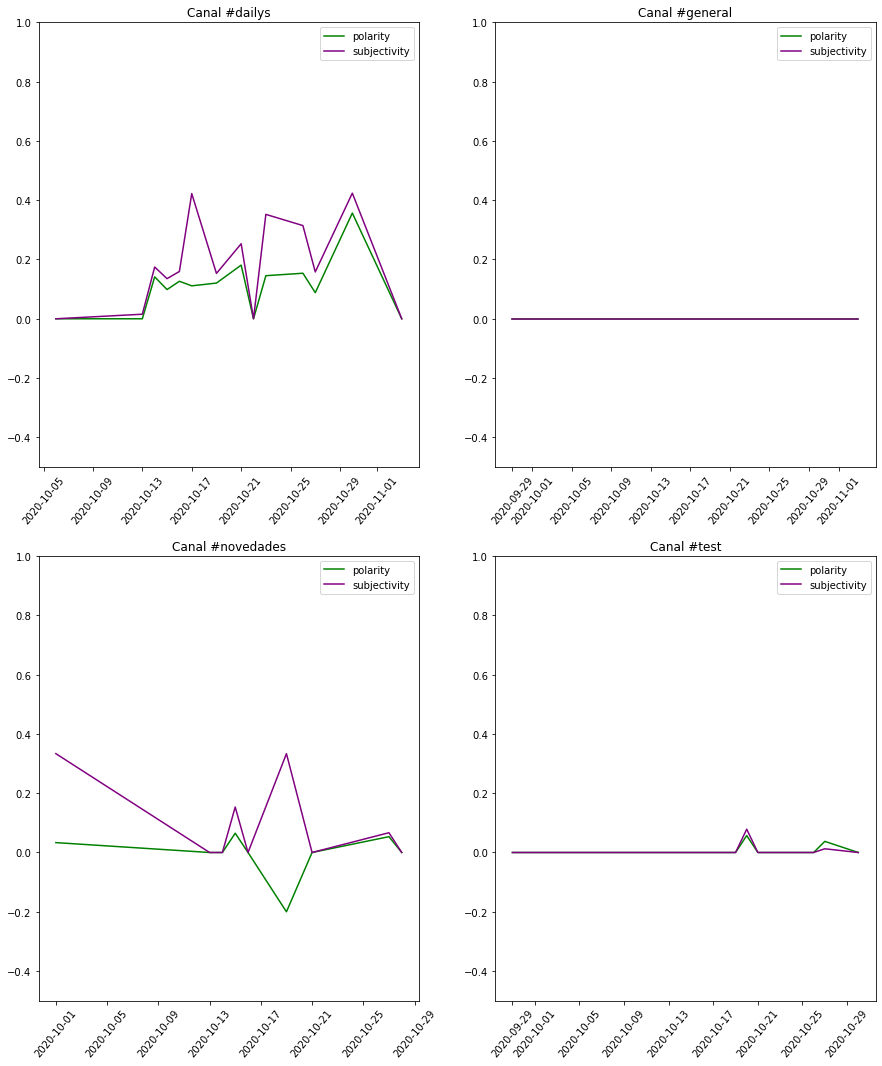

In [47]:
plt.figure (figsize=(15,18))

plt.subplot(221)
p1= sns.lineplot(data=dailys, x='date', y='polarity' , color='green', label='polarity', ci=None)
sns.lineplot(data=dailys, x='date', y='subjectivity', color='purple',label='subjectivity', ci=None)
plt.xticks(rotation=50)
plt.ylabel('')
plt.xlabel('')
plt.ylim(-0.5,1)
plt.title('Canal #dailys')

plt.subplot(222)
p1= sns.lineplot(data=general, x='date', y='polarity' , color='green', label='polarity', ci=None)
sns.lineplot(data=general, x='date', y='subjectivity', color='purple',label='subjectivity', ci=None)
plt.xticks(rotation=50)
plt.ylabel('')
plt.xlabel('')
plt.ylim(-0.5,1)
plt.title('Canal #general')

plt.subplot(223)
p1= sns.lineplot(data=novedades, x='date', y='polarity' , color='green', label='polarity', ci=None)
sns.lineplot(data=novedades, x='date', y='subjectivity', color='purple',label='subjectivity', ci=None)
plt.xticks(rotation=50)
plt.ylabel('')
plt.xlabel('')
plt.ylim(-0.5,1)
plt.title('Canal #novedades')

plt.subplot(224)
p1= sns.lineplot(data=test, x='date', y='polarity' , color='green', label='polarity', ci=None)
sns.lineplot(data=test, x='date', y='subjectivity', color='purple',label='subjectivity', ci=None)
plt.xticks(rotation=50)
plt.ylabel('')
plt.xlabel('')
plt.ylim(-0.5,1)
plt.title('Canal #test')

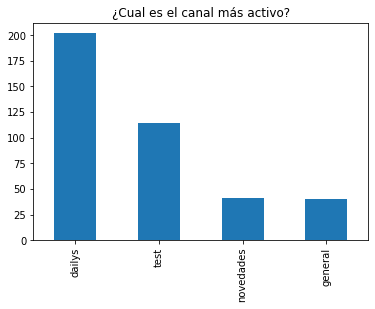

In [48]:
plot1 = df_short['Channel_name'].value_counts().plot(kind='bar',
                                            title='¿Cual es el canal más activo?')


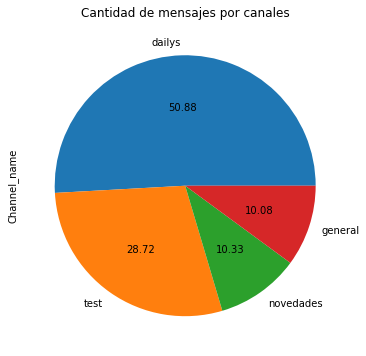

In [49]:
plot2 = df_short['Channel_name'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Cantidad de mensajes por canales')

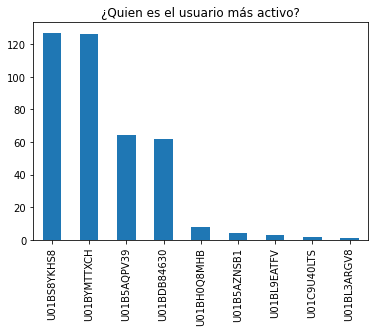

In [50]:
plot1 = df_short['user'].value_counts().plot(kind='bar',
                                            title='¿Quien es el usuario más activo?')

In [54]:
# Obtenemos el número de valores faltantes por columna 
missing_values_count = df.isnull().sum()
missing_values_count[missing_values_count > 0]

client_msg_id         25
text                  19
team                  28
blocks                19
bot_id               397
bot_profile          397
files                370
upload               370
display_as_bot       370
thread_ts            388
reply_count          388
reply_users_count    388
latest_reply         388
reply_users          388
subscribed           388
reactions            374
subtype              396
inviter              397
edited               394
attachments          397
bot_link             397
purpose              396
dtype: int64

In [94]:
df_emojis = df.dropna(subset=['reactions'])

In [97]:
df_emojis['reactions'].count()

23

In [93]:
df_emojis

45     [{'name': 'clap', 'users': ['U01BS8YKHS8'], 'c...
101    [{'name': '+1', 'users': ['U01BS8YKHS8', 'U01B...
123    [{'name': 'smile', 'users': ['U01BS8YKHS8'], '...
142    [{'name': 'joy', 'users': ['U01BYMTTXCH'], 'co...
159    [{'name': '+1', 'users': ['U01BS8YKHS8'], 'cou...
192    [{'name': '+1', 'users': ['U01BS8YKHS8'], 'cou...
214    [{'name': '+1', 'users': ['U01BS8YKHS8'], 'cou...
217    [{'name': 'smile', 'users': ['U01BS8YKHS8'], '...
223    [{'name': '+1', 'users': ['U01BS8YKHS8'], 'cou...
225    [{'name': '+1', 'users': ['U01BS8YKHS8'], 'cou...
255    [{'name': '+1', 'users': ['U01B5AQPV39', 'U01B...
265    [{'name': '+1', 'users': ['U01BYMTTXCH'], 'cou...
267    [{'name': 'clap', 'users': ['U01B5AZNSB1'], 'c...
268    [{'name': 'tada', 'users': ['U01BS8YKHS8'], 'c...
269    [{'name': '+1', 'users': ['U01B5AQPV39'], 'cou...
298    [{'name': '+1', 'users': ['U01B5AQPV39'], 'cou...
316    [{'name': 'smile', 'users': ['U01BS8YKHS8'], '...
337    [{'name': '+1', 'users':

In [73]:
emojis = []

for i in range(0, len(df)):
    reacciones=df['reactions']['name']
    emojis.append(reacciones)
df['emojis'] = pd.Series(emojis)

KeyError: 'name'

In [74]:
df['reactions'].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan,
       "[{'name': 'clap', 'users': ['U01BS8YKHS8'], 'count': 1}]", nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan,
       "[{'name': '+1', 'users': ['U01BS8YKHS8', 'U01B5AQPV39'], 'count': 2}]",
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan,
       "[{'name': 'smile', 'users': ['U01BS8YKHS8'], 'count': 1}]", nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan,